<a href="https://colab.research.google.com/github/chanseongparkk/2022_Data_Analysis_Intern_practice/blob/main/07_27_02_LDA_QDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 패키지 임포트
import os
import warnings
# FutureWarning 제거
warnings.simplefilter(action='ignore', category=FutureWarning) 
import pandas as pd # pandas package
import numpy as np # numpy package 
import scipy as sp # Scipy Package 
from scipy import stats # Scipy Package 
from sklearn import datasets # sklearn dataset 
from sklearn.model_selection import train_test_split # 데이터셋 분리
# 시각화 패키지
import matplotlib.pyplot as plt # matplotlib 시각화 패키지
import seaborn as sns
%matplotlib inline
# os에 따른 Font 깨짐 제거를 위해 Font 지정
import os
if os.name == 'nt' : # Windows OS 
 font_family = "Malgun Gothic"
else: # MAC OS 
 font_family = "AppleGothic"
# - 값이 깨지는 문제 해결을 위해 파라미터값 설정
sns.set(font=font_family, rc ={"axes.unicode_minus" : False})

### LDA

In [ ]:
## dataset load
from sklearn import datasets

data = datasets.load_iris()

t_input_data = data.data

target_data = data.target

flowers = data.target_names

In [ ]:
feature_names = data.feature_names

iris_df = pd.DataFrame(t_input_data, columns = feature_names)
iris_df["species"] = target_data

iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
# train test split

input_data = t_input_data[:,:3]
train_input, test_input, train_target, test_target = train_test_split(input_data, target_data,
                                                                      test_size = 0.1, random_state = 1)

In [ ]:
# LDA library

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# train LDA

lda = LinearDiscriminantAnalysis(store_covariance = True).fit(train_input, train_target) # 공분산 저장

In [ ]:
#수행 후 3개의 차원이 2개로 줄어든 것을 확인
print(train_input.shape)
l_trans = lda.transform(train_input)
l_trans.shape

(135, 3)


(135, 2)

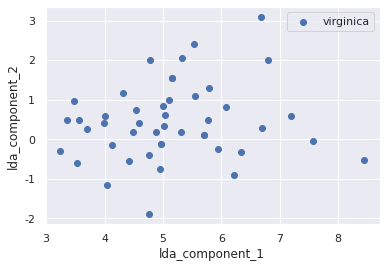

In [ ]:
## 시각화
lda_columns=['lda_component_1','lda_component_2']
irisDF_lda = pd.DataFrame(l_trans, columns=lda_columns)
irisDF_lda['target']=train_target
# print(l_transf)
# setosa는 세모, versicolor는 네모, virginica는 동그라미로 표현
markers=['^', 's', 'o']
for i, marker in enumerate(markers):
 x_axis_data = irisDF_lda[irisDF_lda['target']==i]['lda_component_1']
 y_axis_data = irisDF_lda[irisDF_lda['target']==i]['lda_component_2']
plt.scatter(x_axis_data, y_axis_data, marker=marker,label=data.target_names[i])
plt.legend(loc='upper right')
plt.xlabel('lda_component_1')
plt.ylabel('lda_component_2')
plt.show()

In [ ]:
## test data prediction
l_pred = lda.predict(test_input)
l_pred

array([0, 1, 1, 0, 2, 1, 1, 0, 0, 2, 1, 0, 2, 1, 1])

In [ ]:
## test data accuracy 
print(lda.score(test_input, test_target),"\n")

# 특정값 예측 결과 확인
print(test_input[:5])
print(test_target[:5])
print(lda.predict(test_input[:5]))
print(lda.predict_proba(test_input)[:5])

0.9333333333333333 

[[5.8 4.  1.2]
 [5.1 2.5 3. ]
 [6.6 3.  4.4]
 [5.4 3.9 1.3]
 [7.9 3.8 6.4]]
[0 1 1 0 2]
[0 1 1 0 2]
[[1.00000000e+00 1.00916754e-28 5.63950656e-47]
 [4.33772101e-07 9.99999514e-01 5.25284715e-08]
 [6.28716857e-15 9.99682837e-01 3.17162767e-04]
 [1.00000000e+00 9.84799614e-25 1.72284295e-41]
 [2.06902324e-34 1.01924266e-04 9.99898076e-01]]


In [ ]:
## 성능평가, 혼동행렬
from sklearn.metrics import confusion_matrix
confusion_matrix(test_target, l_pred)

array([[5, 0, 0],
       [0, 6, 0],
       [0, 1, 3]])

In [ ]:
# 사전 확률
lda.priors_

array([0.33333333, 0.32592593, 0.34074074])

In [ ]:
# 클래스별 평균
lda.means_

array([[4.97555556, 3.39111111, 1.45333333],
       [5.92727273, 2.74772727, 4.26590909],
       [6.53478261, 2.94782609, 5.5326087 ]])

In [ ]:
# 독립변수 공분산
lda.covariance_

array([[0.25151653, 0.07826984, 0.16368446],
       [0.07826984, 0.10756296, 0.04919396],
       [0.16368446, 0.04919396, 0.17668112]])

In [ ]:
## 분류 리포트
from sklearn.metrics import classification_report

print(classification_report(test_target, l_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.86      1.00      0.92         6
           2       1.00      0.75      0.86         4

    accuracy                           0.93        15
   macro avg       0.95      0.92      0.93        15
weighted avg       0.94      0.93      0.93        15



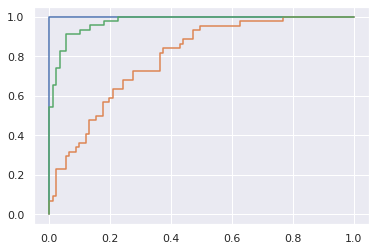

In [ ]:
# ROC curve

from sklearn.preprocessing import label_binarize

lda_train_vec = label_binarize(train_target, classes = [0, 1, 2])

from sklearn.metrics import roc_curve

for i in range(3):
  lda = LinearDiscriminantAnalysis().fit(train_input, lda_train_vec[:,i])
  fpr, tpr, thr = roc_curve(lda_train_vec[:,i],lda.predict_proba(train_input)[:,1])
  plt.plot(fpr,tpr)

plt.show()

### QDA

In [ ]:
### QDA import

from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# QDA train
qda = QuadraticDiscriminantAnalysis(store_covariance=True).fit(train_input, train_target)

# predict
y2_pred = qda.predict(test_input)

In [ ]:
# 결과 측정
print(qda.score(test_input, test_target))

print(test_input[:5])
print(test_target[:5])
print(qda.predict(test_input[:5]))
print(qda.predict_proba(test_input)[:5])

0.9333333333333333
[[5.8 4.  1.2]
 [5.1 2.5 3. ]
 [6.6 3.  4.4]
 [5.4 3.9 1.3]
 [7.9 3.8 6.4]]
[0 1 1 0 2]
[0 1 1 0 2]
[[1.00000000e+000 1.47416908e-033 1.80019547e-046]
 [1.28636834e-023 9.99995490e-001 4.51028882e-006]
 [8.80326122e-080 9.99774984e-001 2.25016220e-004]
 [1.00000000e+000 5.08491425e-030 7.35720444e-040]
 [4.29933249e-215 1.45529755e-003 9.98544702e-001]]


In [ ]:
confusion_matrix(test_target, y2_pred)

array([[5, 0, 0],
       [0, 6, 0],
       [0, 1, 3]])

In [ ]:
# 사전 확률
qda.priors_

array([0.33333333, 0.32592593, 0.34074074])

In [ ]:
# 클래스 별 평균
qda.means_

array([[4.97555556, 3.39111111, 1.45333333],
       [5.92727273, 2.74772727, 4.26590909],
       [6.53478261, 2.94782609, 5.5326087 ]])

In [ ]:
# 독립변수 공분산
qda.covariance_

[array([[0.11370707, 0.08818687, 0.02201515],
        [0.08818687, 0.13673737, 0.01230303],
        [0.02201515, 0.01230303, 0.02527273]]),
 array([[0.26621564, 0.07820296, 0.1746723 ],
        [0.07820296, 0.09743658, 0.07701374],
        [0.1746723 , 0.07701374, 0.20695032]]),
 array([[0.38898551, 0.07385507, 0.30261836],
        [0.07385507, 0.09588406, 0.06196135],
        [0.30261836, 0.06196135, 0.30757971]])]

In [ ]:
print(classification_report(test_target, y2_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.86      1.00      0.92         6
           2       1.00      0.75      0.86         4

    accuracy                           0.93        15
   macro avg       0.95      0.92      0.93        15
weighted avg       0.94      0.93      0.93        15



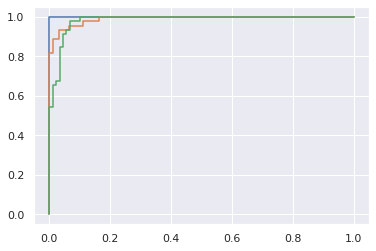

In [ ]:
# ROC curve

from sklearn.preprocessing import label_binarize

y2_vec = label_binarize(train_target, classes = [0, 1, 2])

from sklearn.metrics import roc_curve

for i in range(3):
  qda = QuadraticDiscriminantAnalysis().fit(train_input, y2_vec[:,i])
  fpr, tpr, thr = roc_curve(y2_vec[:,i],qda.predict_proba(train_input)[:,1])
  plt.plot(fpr,tpr)

plt.show()